# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

seed =42


## Load the Data

In [2]:
df = pd.read_csv('Traffic_Accidents.csv')

In [3]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [5]:
df.shape

(52000, 30)

In [6]:
df.isna().sum()

Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                                    1041
2nd_Road_Cla

In [7]:
df.drop(columns='Date' , inplace=True)

In [8]:
df.drop(columns='Accident_Index' , inplace=True)

In [9]:
df.drop(columns='Unnamed: 0' , inplace=True)



In [10]:
df['Road_Surface_Conditions'].isna().sum()

1

In [11]:
df['Road_Surface_Conditions'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52000 entries, 0 to 51999
Series name: Road_Surface_Conditions
Non-Null Count  Dtype 
--------------  ----- 
51999 non-null  object
dtypes: object(1)
memory usage: 406.4+ KB


In [12]:
df.duplicated().sum()

1

In [13]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [14]:
df.dropna(inplace=True)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [15]:
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
oe = OrdinalEncoder()


In [16]:
num_col = Pipeline([('scaler',scaler),('impute' , SimpleImputer(strategy='mean'))])

cat_col = Pipeline([('ordinalencoder' , oe),('impute' , SimpleImputer(strategy='most_frequent'))])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


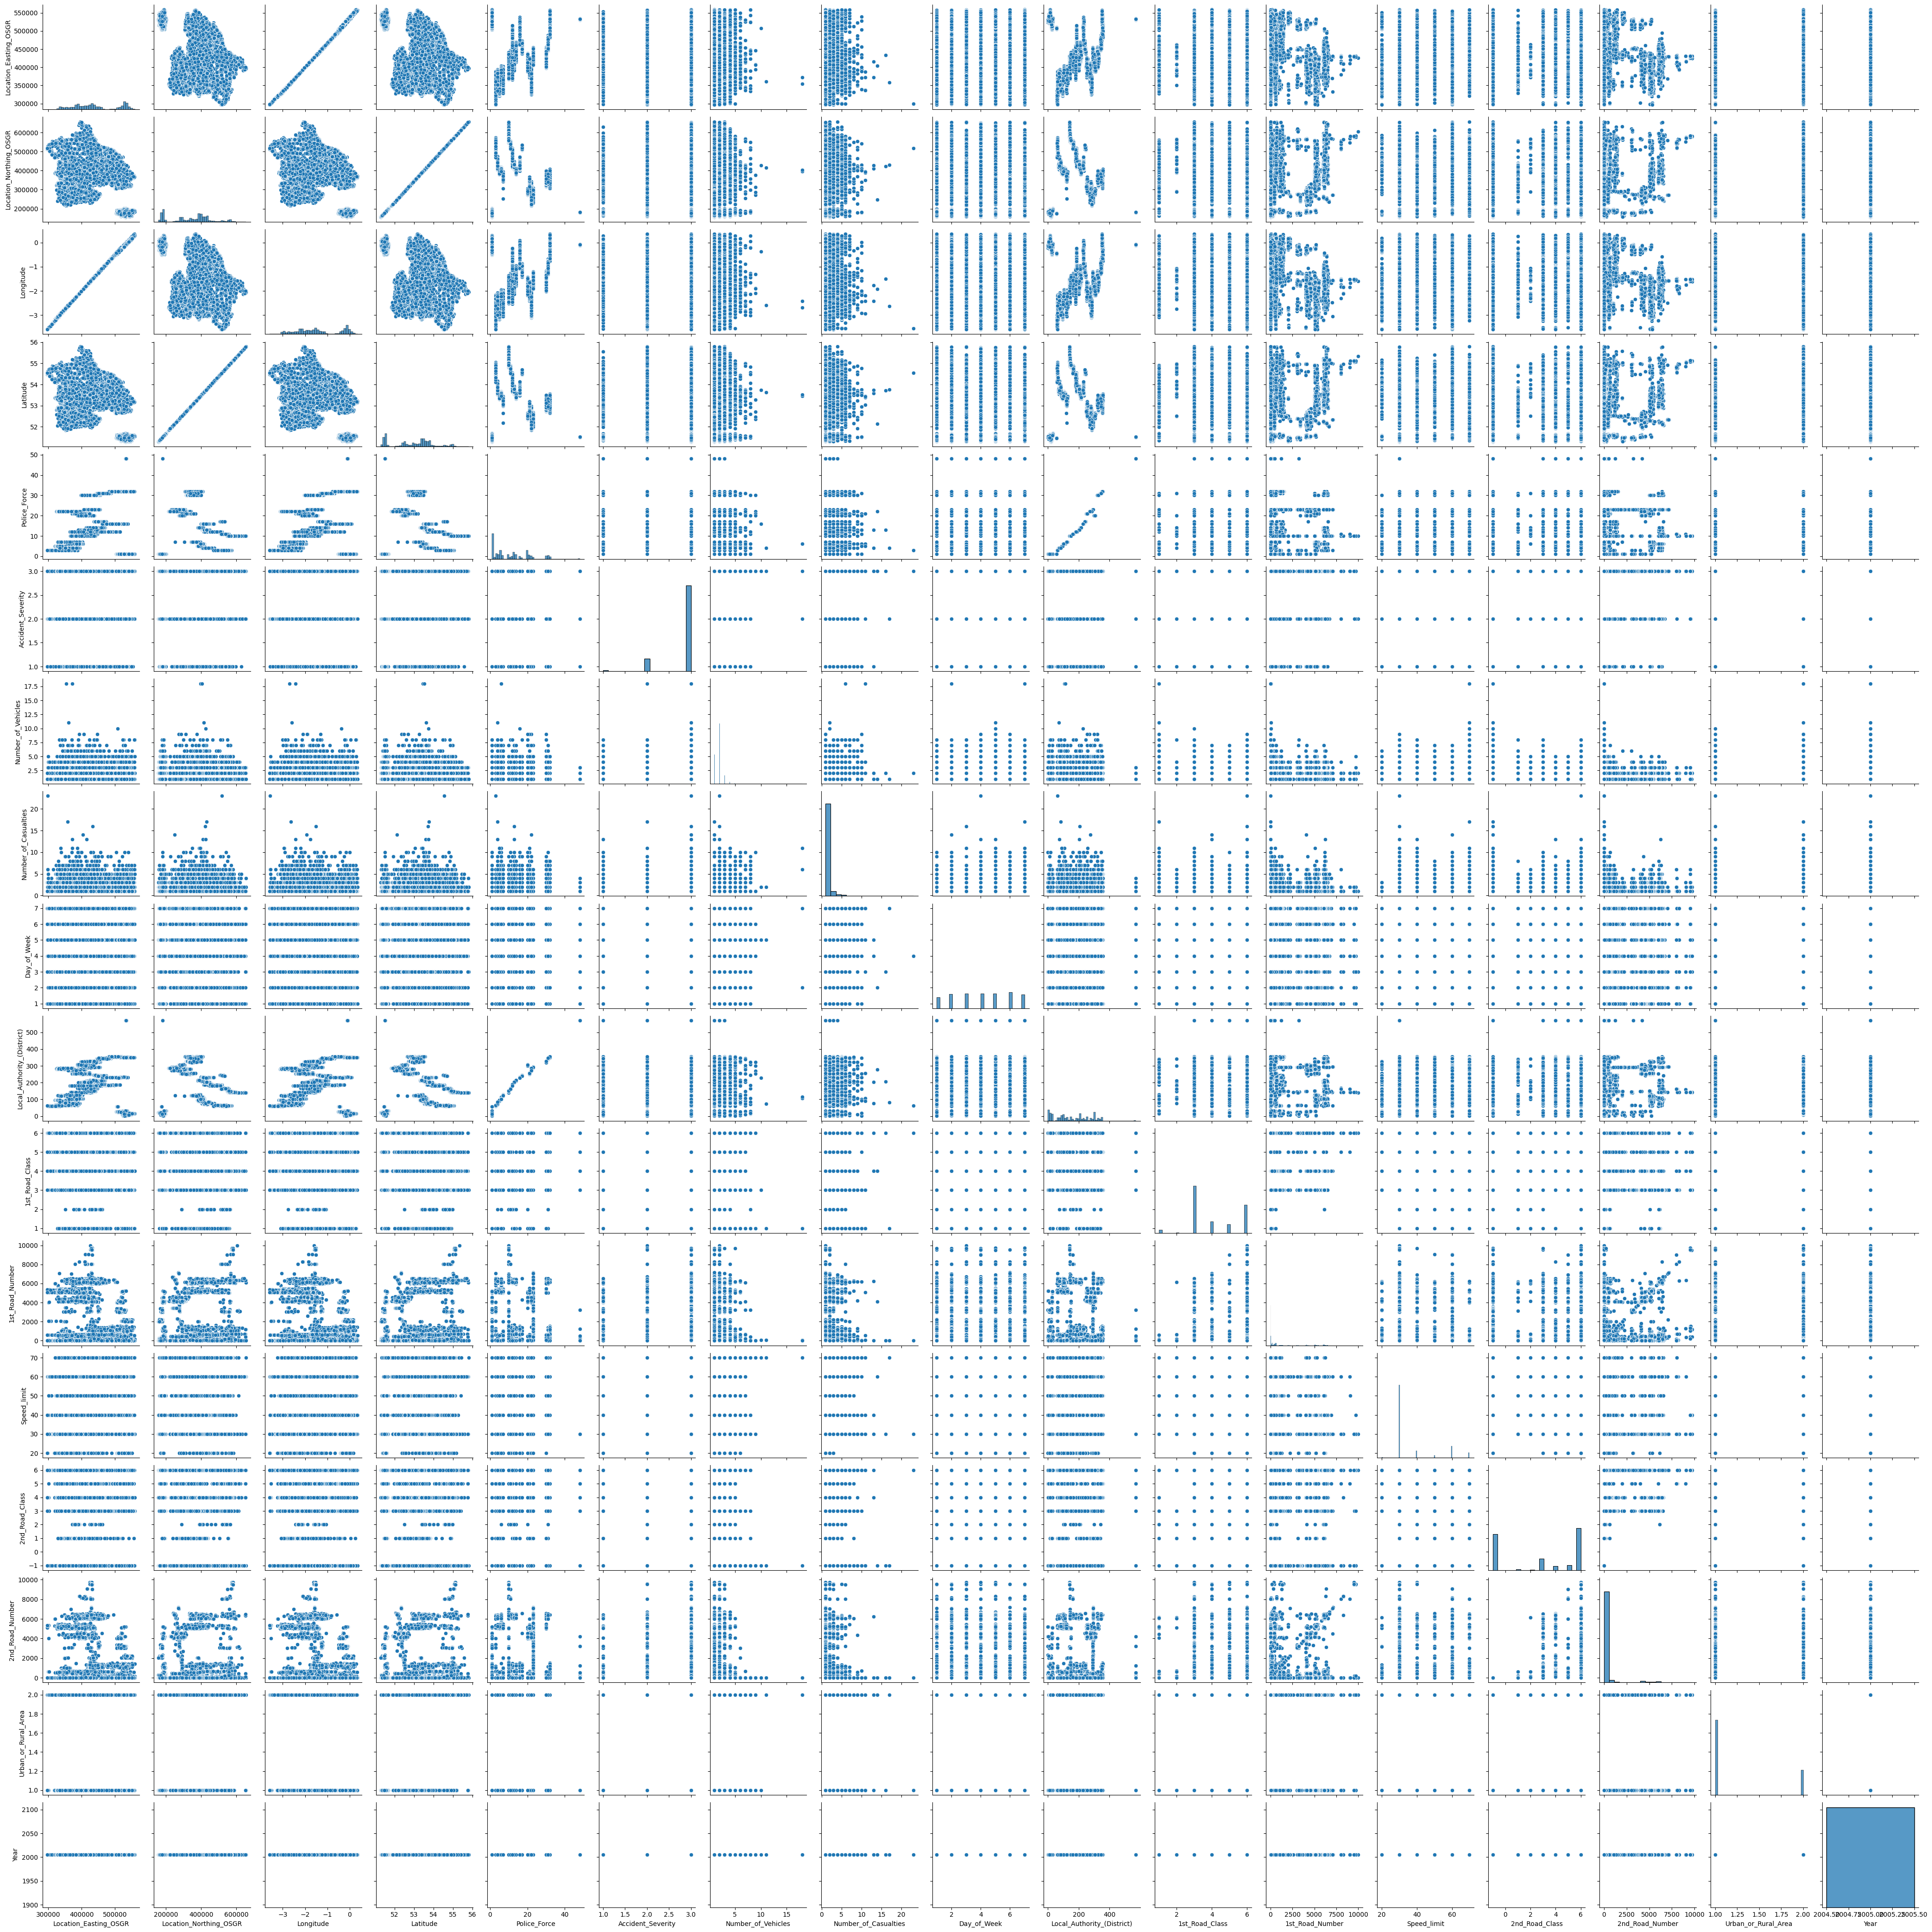

In [75]:
sns.pairplot(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49595 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49595 non-null  float64
 1   Location_Northing_OSGR                       49595 non-null  float64
 2   Longitude                                    49595 non-null  float64
 3   Latitude                                     49595 non-null  float64
 4   Police_Force                                 49595 non-null  int64  
 5   Accident_Severity                            49595 non-null  int64  
 6   Number_of_Vehicles                           49595 non-null  float64
 7   Number_of_Casualties                         49595 non-null  int64  
 8   Day_of_Week                                  49595 non-null  float64
 9   Time                                         49595 non-null  object 
 10  Loc

In [18]:
df['Road_Surface_Conditions'].unique()

array(['Dry', 'Normal', 'Wet/Damp', 'Frost/Ice',
       'Flood (Over 3cm of water)', 'Snow'], dtype=object)

In [19]:
#columns selection 

num = ['Police_Force' , 'Accident_Severity' ,'Number_of_Vehicles' , 'Number_of_Casualties' , 'Day_of_Week' , 'Speed_limit','Urban_or_Rural_Area']

cat = ['Road_Type','Weather_Conditions' , 'Road_Surface_Conditions' , 'Did_Police_Officer_Attend_Scene_of_Accident']

In [20]:
from sklearn.compose import ColumnTransformer

pre_proc =ColumnTransformer([
    ('cat',cat_col,cat),
    ('num',num_col,num)
])

In [44]:
df_p = pre_proc.fit_transform(df)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2 , random_state=seed)

df_reducted = pca.fit_transform(df_p)

In [64]:
print(pca.explained_variance_ratio_)

[0.37990843 0.1281428 ]


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

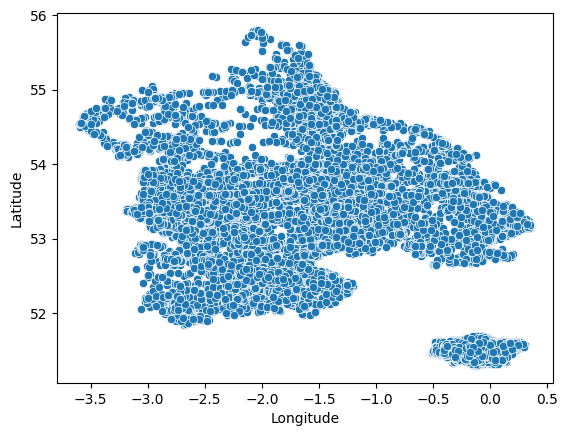

In [22]:
sns.scatterplot(data=df, x=df['Longitude'] , y=df['Latitude'])

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [53]:
from sklearn.cluster import KMeans
list = []
for k in range(2,10):
    km = KMeans(n_clusters=k , random_state=seed)
    km.fit(df_reducted)
    list.append(km.inertia_)
list




[121285.72283250204,
 72586.49900053142,
 45303.63710648655,
 37114.307091706345,
 25170.9189919125,
 20650.752884435933,
 17900.50265054782,
 15886.624176515006]

Text(0, 0.5, 'Inertia')

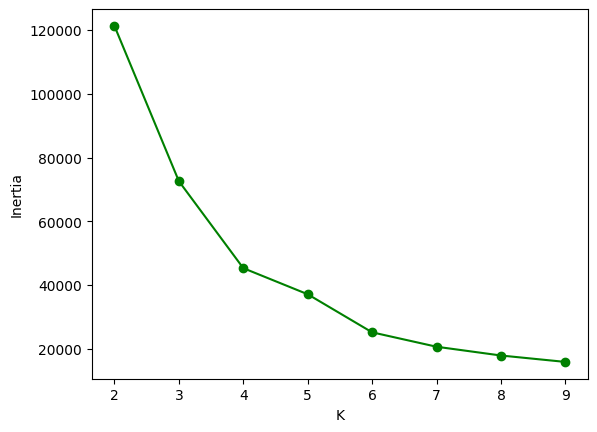

In [54]:
plt.plot(range(2,10), list, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia")

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4 , random_state=seed)

km.fit(df_reducted)


KMeans(n_clusters=4, random_state=42)

In [71]:
labels =km.labels_

In [67]:
df_last = pd.DataFrame(df_reducted, columns=['pc1','pc2'])

In [37]:
print(pca.explained_variance_ratio_)

[0.73339063 0.15554779]


## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

<Axes: xlabel='pc1', ylabel='pc2'>

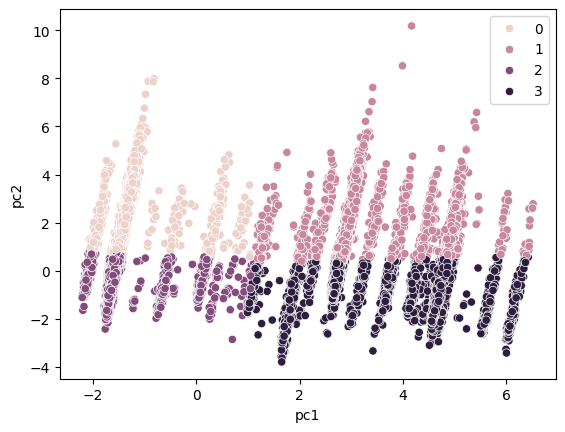

In [74]:
sns.scatterplot(data=df_last , x='pc1' , y='pc2' , hue=labels)


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

1. because there was  a corrlation between them

2. i used the elbow methoed 

3. PCA